In [79]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## lets import the data

In [80]:
#lets import the data
df=pd.read_csv('mpg.csv')

## Structure of dataset
- find missing values in different columns of dataset
- if missing value available then,drop that row



In [81]:
df.info()
df.isna().sum()
df['horsepower'].unique()
df.dropna(axis=0,inplace=True)
df['horsepower'].isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


0

# lets try to generate a meaningful insight from above data using univariate analysis.



- #lets check out the numerical distribution analysis


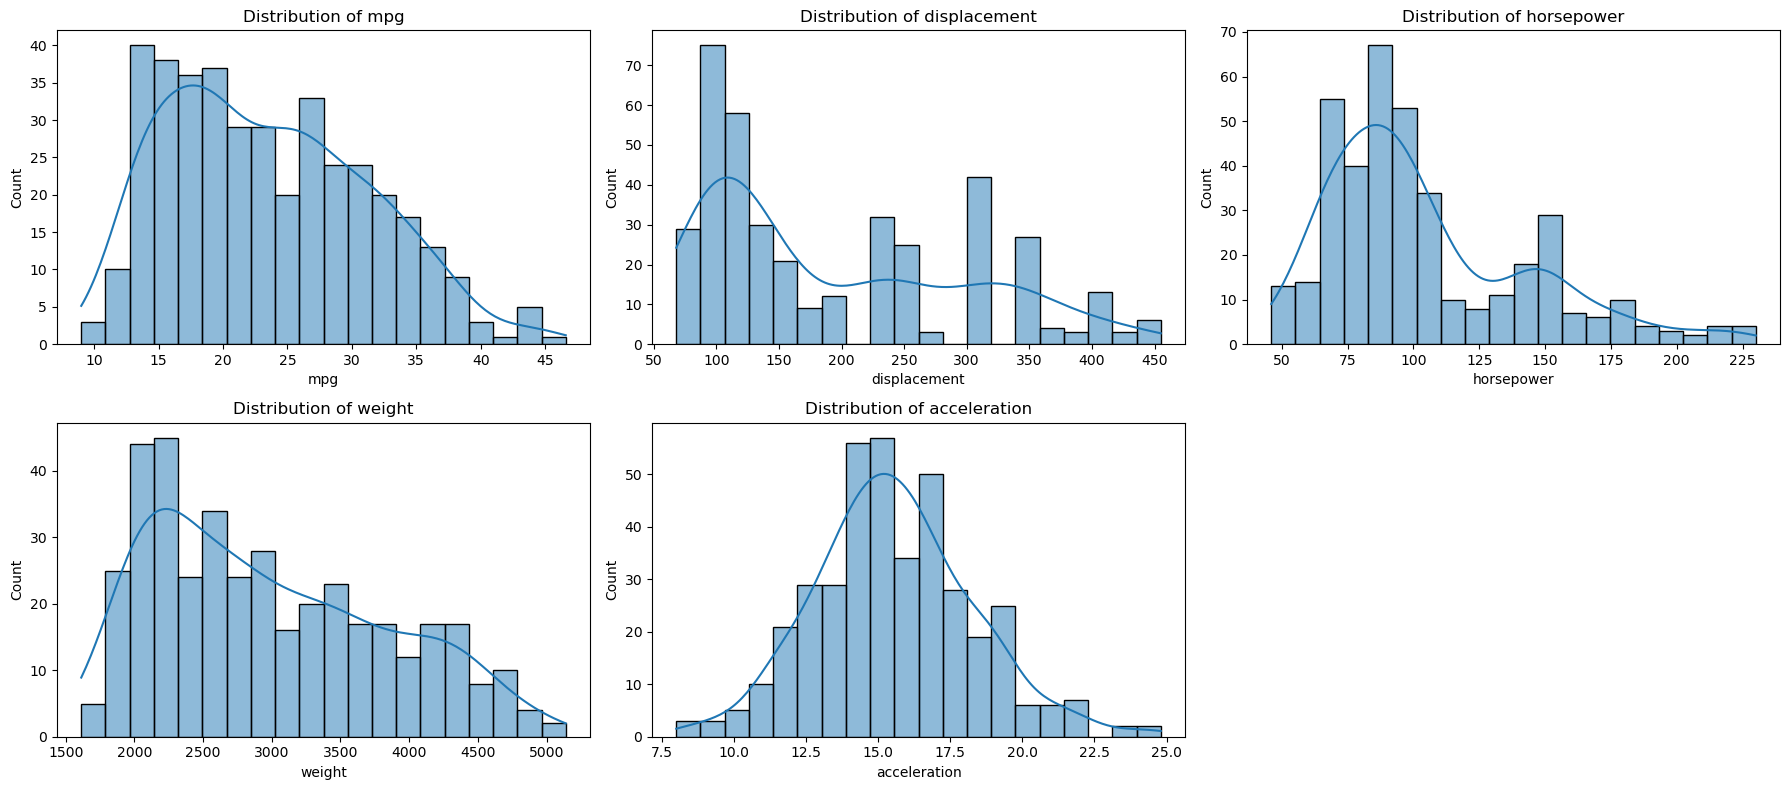

0.29158692574060485


In [88]:
numericalfeatures = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

plt.figure(figsize=(18, 8))  # set overall figure size

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(2, 3, i)  # create 2 rows, 3 columns
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
print(df['acceleration'].skew())    

## Insights from above hist graph
#### MPG(Miles Per Gallon)
- the most cars have mpg between 15-28 mpg.
- Data column seems fairly symmetric
#### Displacement
- the most cars have displacement of between 90-120 and also around 300-320 
- right skewed dataset
- uni modal
#### Horsepower
- the most car have horsepower in range 60-100 and fewer cars with more horsepower than that.
- right skewed dataset 
- uni modal
#### weight
- the weight distribution is also quite famous/more in range of 2000- 3000 
-  moderate right skewed data columns
- uni modal
#### acceleration
- more acceleration value is concetrated towards 14-18
- data COlumn is almost normally distributed

In [89]:

# univariate_plots = []
# for feature in numericalfeatures:
#     fig = px.histogram(df, x=feature, nbins=20, title=f"Distribution of {feature}", marginal="box")
#     univariate_plots.append(fig)


### Now lets see box plot for the numerical features too

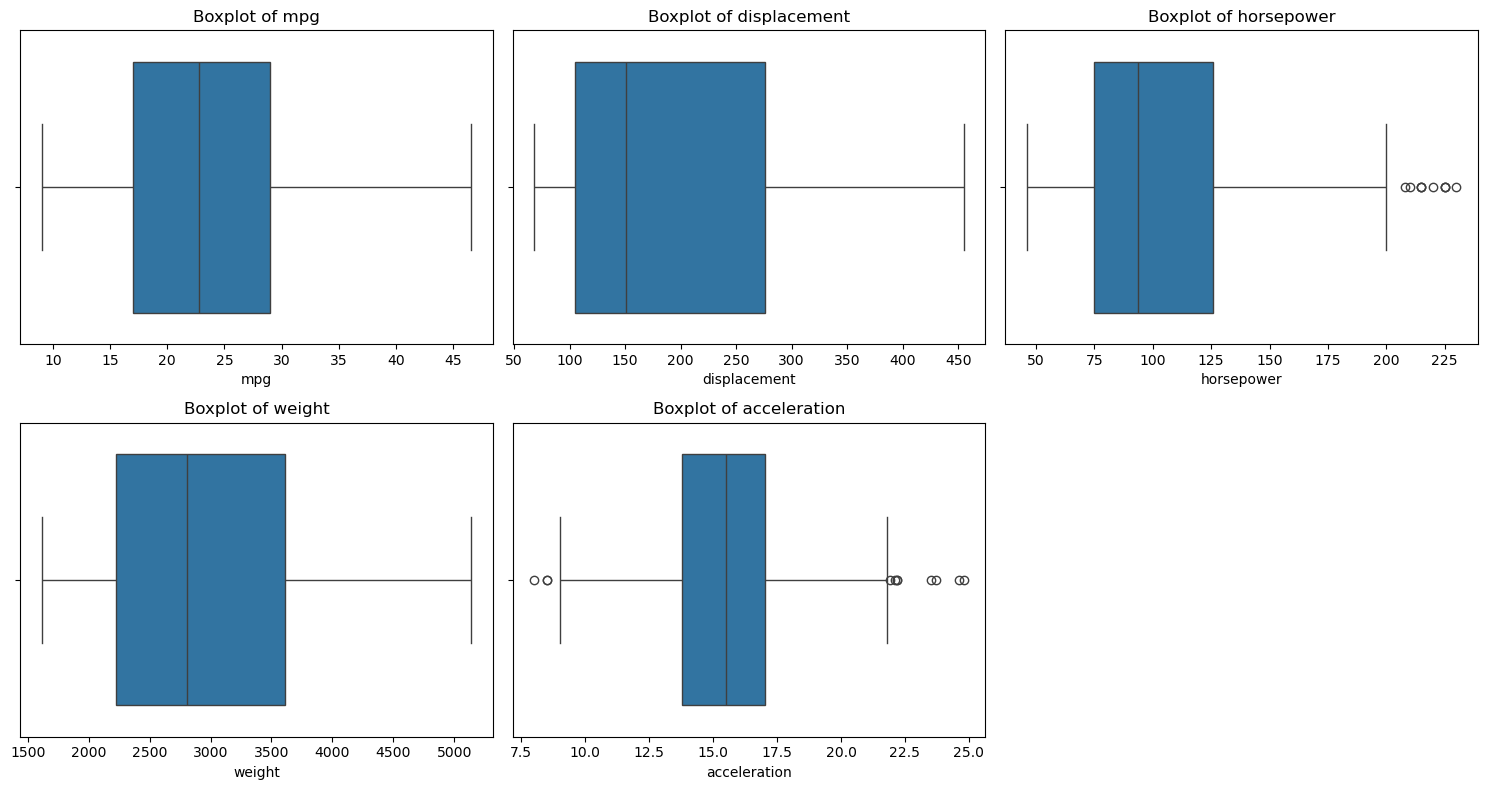

In [91]:

plt.figure(figsize=(15, 8))  # Bigger figure to fit all subplots

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(2, 3, i)  # Arrange in 2 rows, 3 columns (6 slots, you use 5)
    sns.boxplot(x=df[feature], orient='h')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

##### Insights from above boxplot
- We can see median,Q1(25 percentile),Q3(75 percentile),Inter Quartile Range(IQR) from boxplot
- As an example, displacement dataset have median value of 150,Q1=101,Q3=280 and there is no outlier in it
- There are many outlier values in data columns like horsepower,acceleration which has no use in further analysis.





In [ ]:
# fig1=[]
# for feature in numericalfeatures:
#     fig=px.box(df,x=feature,title=f"Distribution of {feature}")
#     fig1.append(fig1)

#### Now make analysis for categorical dataset

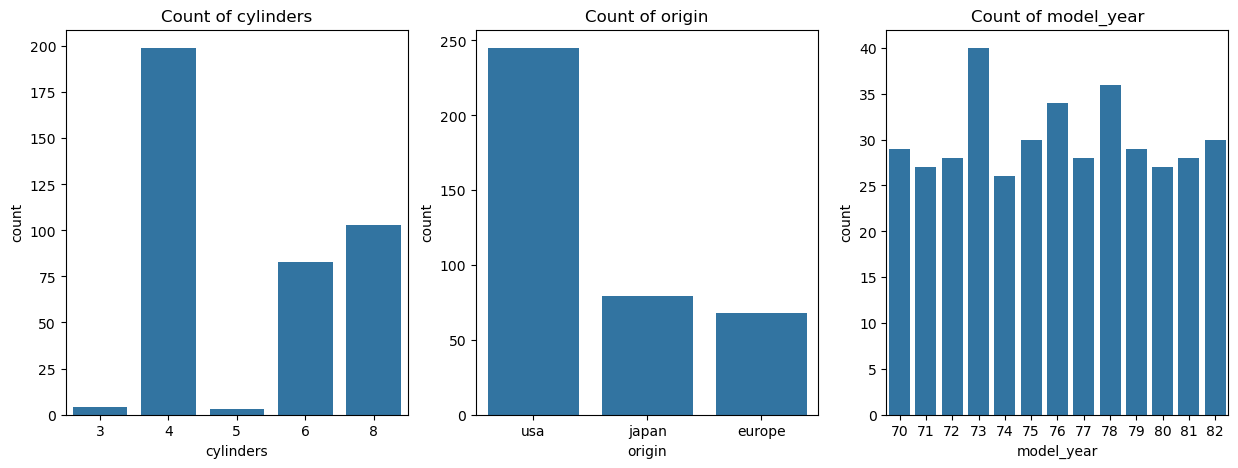

In [ ]:
categorical_cols = ['cylinders', 'origin', 'model_year']
fig2=[]
plt.figure(figsize=(15, 5))  # Adjust width and height to fit plots nicely

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
       
    fig = px.histogram(df, x=col, title=f"Count of {col}", color=col)  # to save them so convert them to pyplot too
    fig2.append(fig)



##### Insights from above Columnar based countplot  Dataset
- most of the car  have 4 cylinders and some have 6 and 8 cylinders.
- most of the car in dataset have origin of USA and then rest are from japan and europe
- most of the car are made in year 73,78 and rest cars are almost equally from each year ranging from  1970-1982 and   dataset seems quite normally distributed



###  Lets check the data distribution proportions in percentaage using Pie Chart

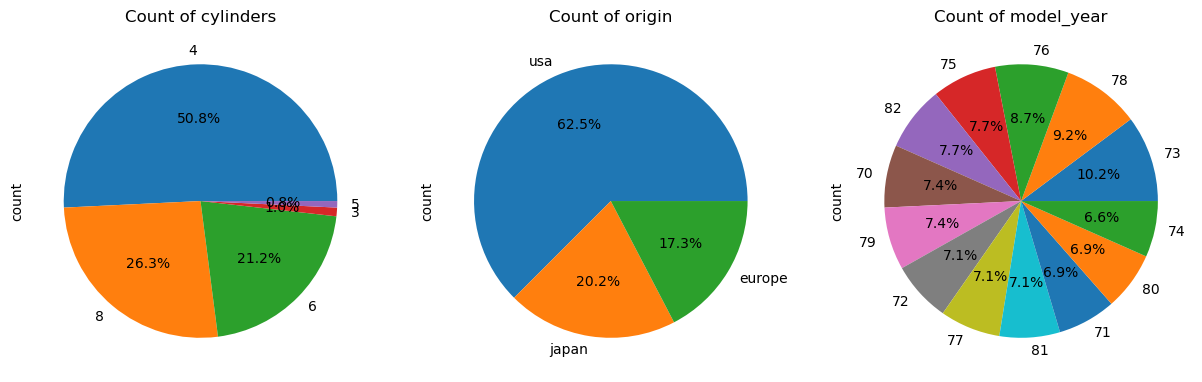

In [99]:
plt.figure(figsize=(15, 5)) 
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Count of {col}')
       

fig = px.pie(df, names='cylinders', title='Distribution of Cylinders')

### Insights from above pie chart 
- The above pie chart clearly shows the datset distribution of their unique values of 3 categorical columns.
- Let's look after count of origin column,here 62.5% car are made from usa,20.2%,17.3% from japan and europe respectively.
- This shows how evenly our dataset is distributed and help in analyzing for bivariate and multi variate analysis too.


# Bivariate analysis 

### Let's look for scatterplot(numerical-numerical relationship)

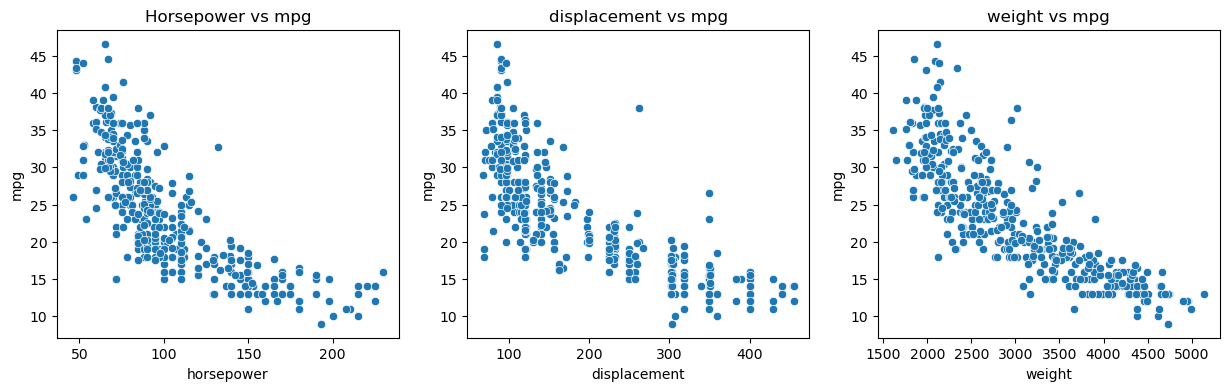

In [102]:

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x='horsepower',y='mpg',data=df)
plt.title('Horsepower vs mpg')

fig1 = px.scatter(df, x='horsepower', y='mpg', title='Horsepower vs MPG')

plt.subplot(1,3,2)
sns.scatterplot(x='displacement',y='mpg',data=df)
plt.title('displacement vs mpg')

pfig2 = px.scatter(df, x='displacement', y='mpg', title='Displacement vs MPG')


plt.subplot(1,3,3)
sns.scatterplot(x='weight',y='mpg',data=df)
plt.title('weight vs mpg')

pfig2 = px.scatter(df, x='weight', y='mpg', title='weight  vs MPG')


## Insights from above Scatter plot
- with increase of horsepower ,the mpg of the car decreases linearly (negative corelation)
- with displacement increase ,mpg of the car decreases(neg correlation)
- with increase in weight too,the mpg decreases (negative corelation )
- So as conclusion with heavy weight ,more engine displacement and high horsepower,the mileage decreases,this features in car tend to consume more fuels
- So the optimum choice will be to choice smaller displacement engines with low weight and average horsepower can be best choice.  


In [104]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


###  Now let's try to analyze between numerical-categorical Dataset

### Barplot analysis

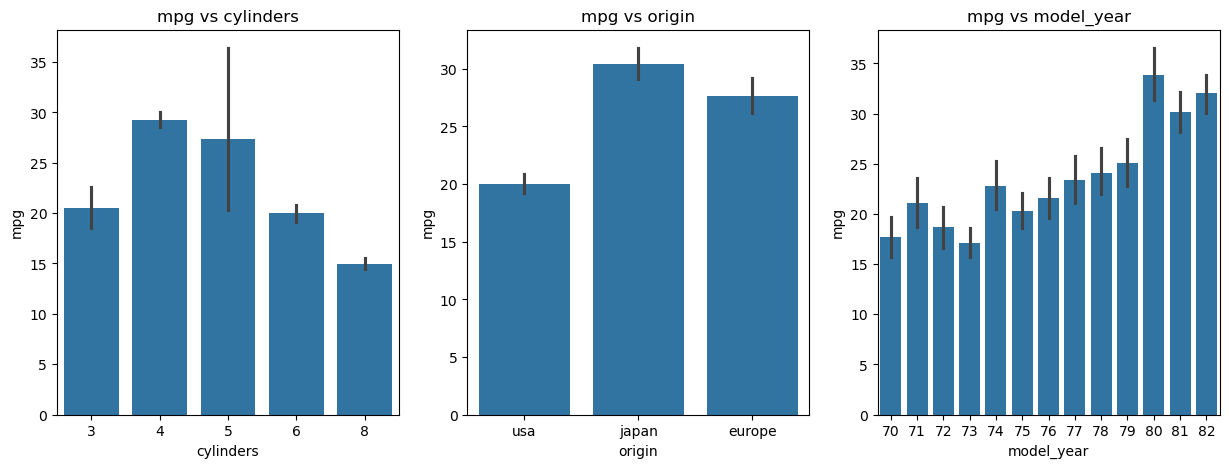

In [ ]:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x='cylinders',y='mpg',data=df)
plt.title('mpg vs cylinders')


fig1 = px.bar(df, x='cylinders', y='mpg', title='MPG vs Cylinders', barmode='group', 
              labels={'mpg': 'Miles per Gallon', 'cylinders': 'Cylinders'})


plt.subplot(1,3,2)
sns.barplot(x='origin',y='mpg',data=df)
plt.title('mpg vs origin')


fig2 = px.bar(df, x='origin', y='mpg', title='MPG vs Origin', barmode='group',
              labels={'mpg': 'Miles per Gallon', 'origin': 'Origin'})


plt.subplot(1,3,3)
sns.barplot(x='model_year',y='mpg',data=df)
plt.title('mpg vs model_year')
plt.show()

fig3 = px.bar(df, x='model_year', y='mpg', title='MPG vs Model Year', barmode='group',
              labels={'mpg': 'Miles per Gallon', 'model_year': 'Model Year'})



### Insights from above Graph
##### Mpg vs cylinders
- vehicles with  cylinders have high mpg,means 4 cylinders car are the most efficient(fuel efficient) while with 8 cylinders is worst.
##### origin v mpg
- the car made in japan and europe  have high fuel efficiency in comparision to usa,means japenese and europe car may tend to have optimum horsepower,low engine displacement so its mpg is high,we will see all their relation in multi variate analysis.
##### model_year vs mpg
- tha car maade in between  (1980-1982)  have the high mpg and trend shows each production of car in sucessive years compare to regressive have high performace,means car performance is optimized each year 





## Check using Heatmap  

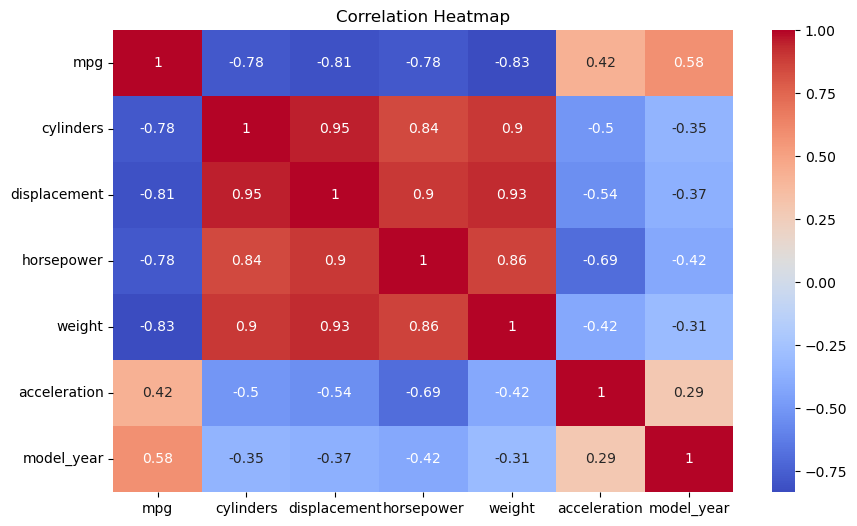

In [111]:

import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
# sns.heatmap(df)
plt.title('Correlation Heatmap')
plt.show()


# Compute correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    origin='upper',
    title='Correlation Heatmap'
)

### Insights from above heatmap
- mpg and weight(-0.83)-this shows ,higher  weight car always tend to have  low mpg
- cylinders and displacement (0.95) ,higher engine displacement tend to have high no of cylinders
- cylinders and mpg(-0.78) ,shows that high no of cylinders in engine tends to strongly decrease mpg
- horsepower and displacement (0.9) ,this tends high displacement engines have high horse powers.
- mpg and acceleration (0.42) -shows  postive corelation high acceleration cars tends to have high mpg
- mpg and model year(0.58) -postive corelation




#### Now let's check relationship between categorical-categorical column dataset

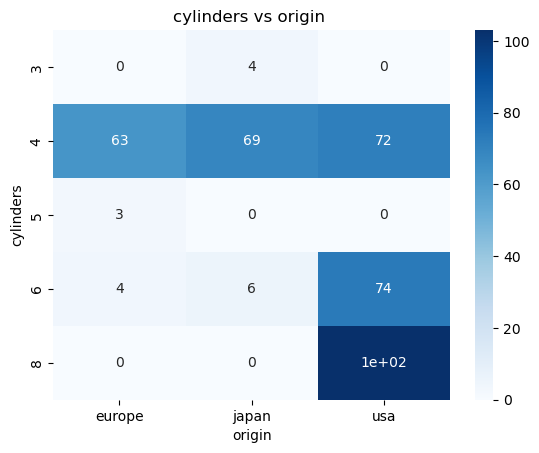

In [ ]:

crosstab=pd.crosstab(df['cylinders'],df['origin'])
plt.title('cylinders vs origin ')
sns.heatmap(crosstab,annot=True,cmap='Blues')
plt.show()

fig = px.imshow(
    crosstab,
    text_auto=True,
    color_continuous_scale='Blues',
    labels=dict(x='Origin', y='Cylinders', color='Count'),
    title='Cylinders vs Origin Crosstab Heatmap'
)


### Insights from above graph for categorical columns
#### cylinders vs origin datset
- Japan or Europe may favor 4-cylinder cars .
- USA may have more cars with 6 or 8 cylinders (larger engines).


  # Multi-variate analysis 

#### Let's try scatterplot

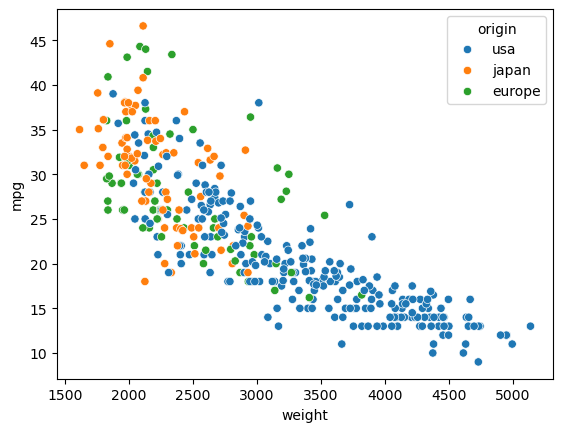

In [ ]:

sns.scatterplot(x='weight',y='mpg',hue='origin',data=df)

fig = px.scatter(
    df,
    x='weight',
    y='mpg',
    color='origin',  # This adds the hue grouping by 'origin'
    title='MPG vs Weight by Origin',
    labels={'weight': 'Weight', 'mpg': 'Miles per Gallon', 'origin': 'Origin'}
)


### Insights from above dataset
- USA  origin cars have high weight with low mpg
-  Generally Japan and Europe cars tend to have low weight with high mpg




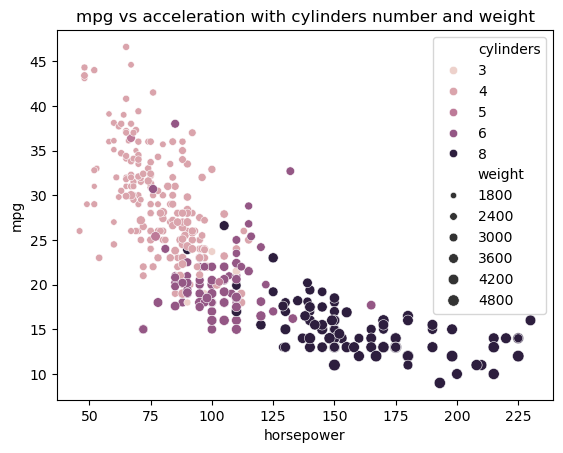

In [112]:
sns.scatterplot(x='horsepower',y='mpg',hue='cylinders',size='weight',data=df,
                ) 
plt.title('mpg vs acceleration with cylinders number and weight')
plt.show()


fig = px.scatter(
    df,
    x='horsepower',
    y='mpg',
    color='cylinders',    # categorical coloring
    size='weight',        # size by weight
    title='MPG vs Horsepower with Cylinders and Weight',
    labels={'horsepower': 'Horsepower', 'mpg': 'Miles per Gallon', 'cylinders': 'Cylinders', 'weight': 'Weight'},
    size_max=15           # max size of points
)




### Insights from above scatter plot
- the cars with high weight tends to have high horsepower low mpeg and high cylinders
- cars with more cylinders tends to cluster towars horsepower and lower mpg
-cars with low horsepower tends to have low cylinders and high mpg



In [57]:
#now let's do pair plot analysis for whole dataset
mpgdata=sns.load_dataset('mpg')

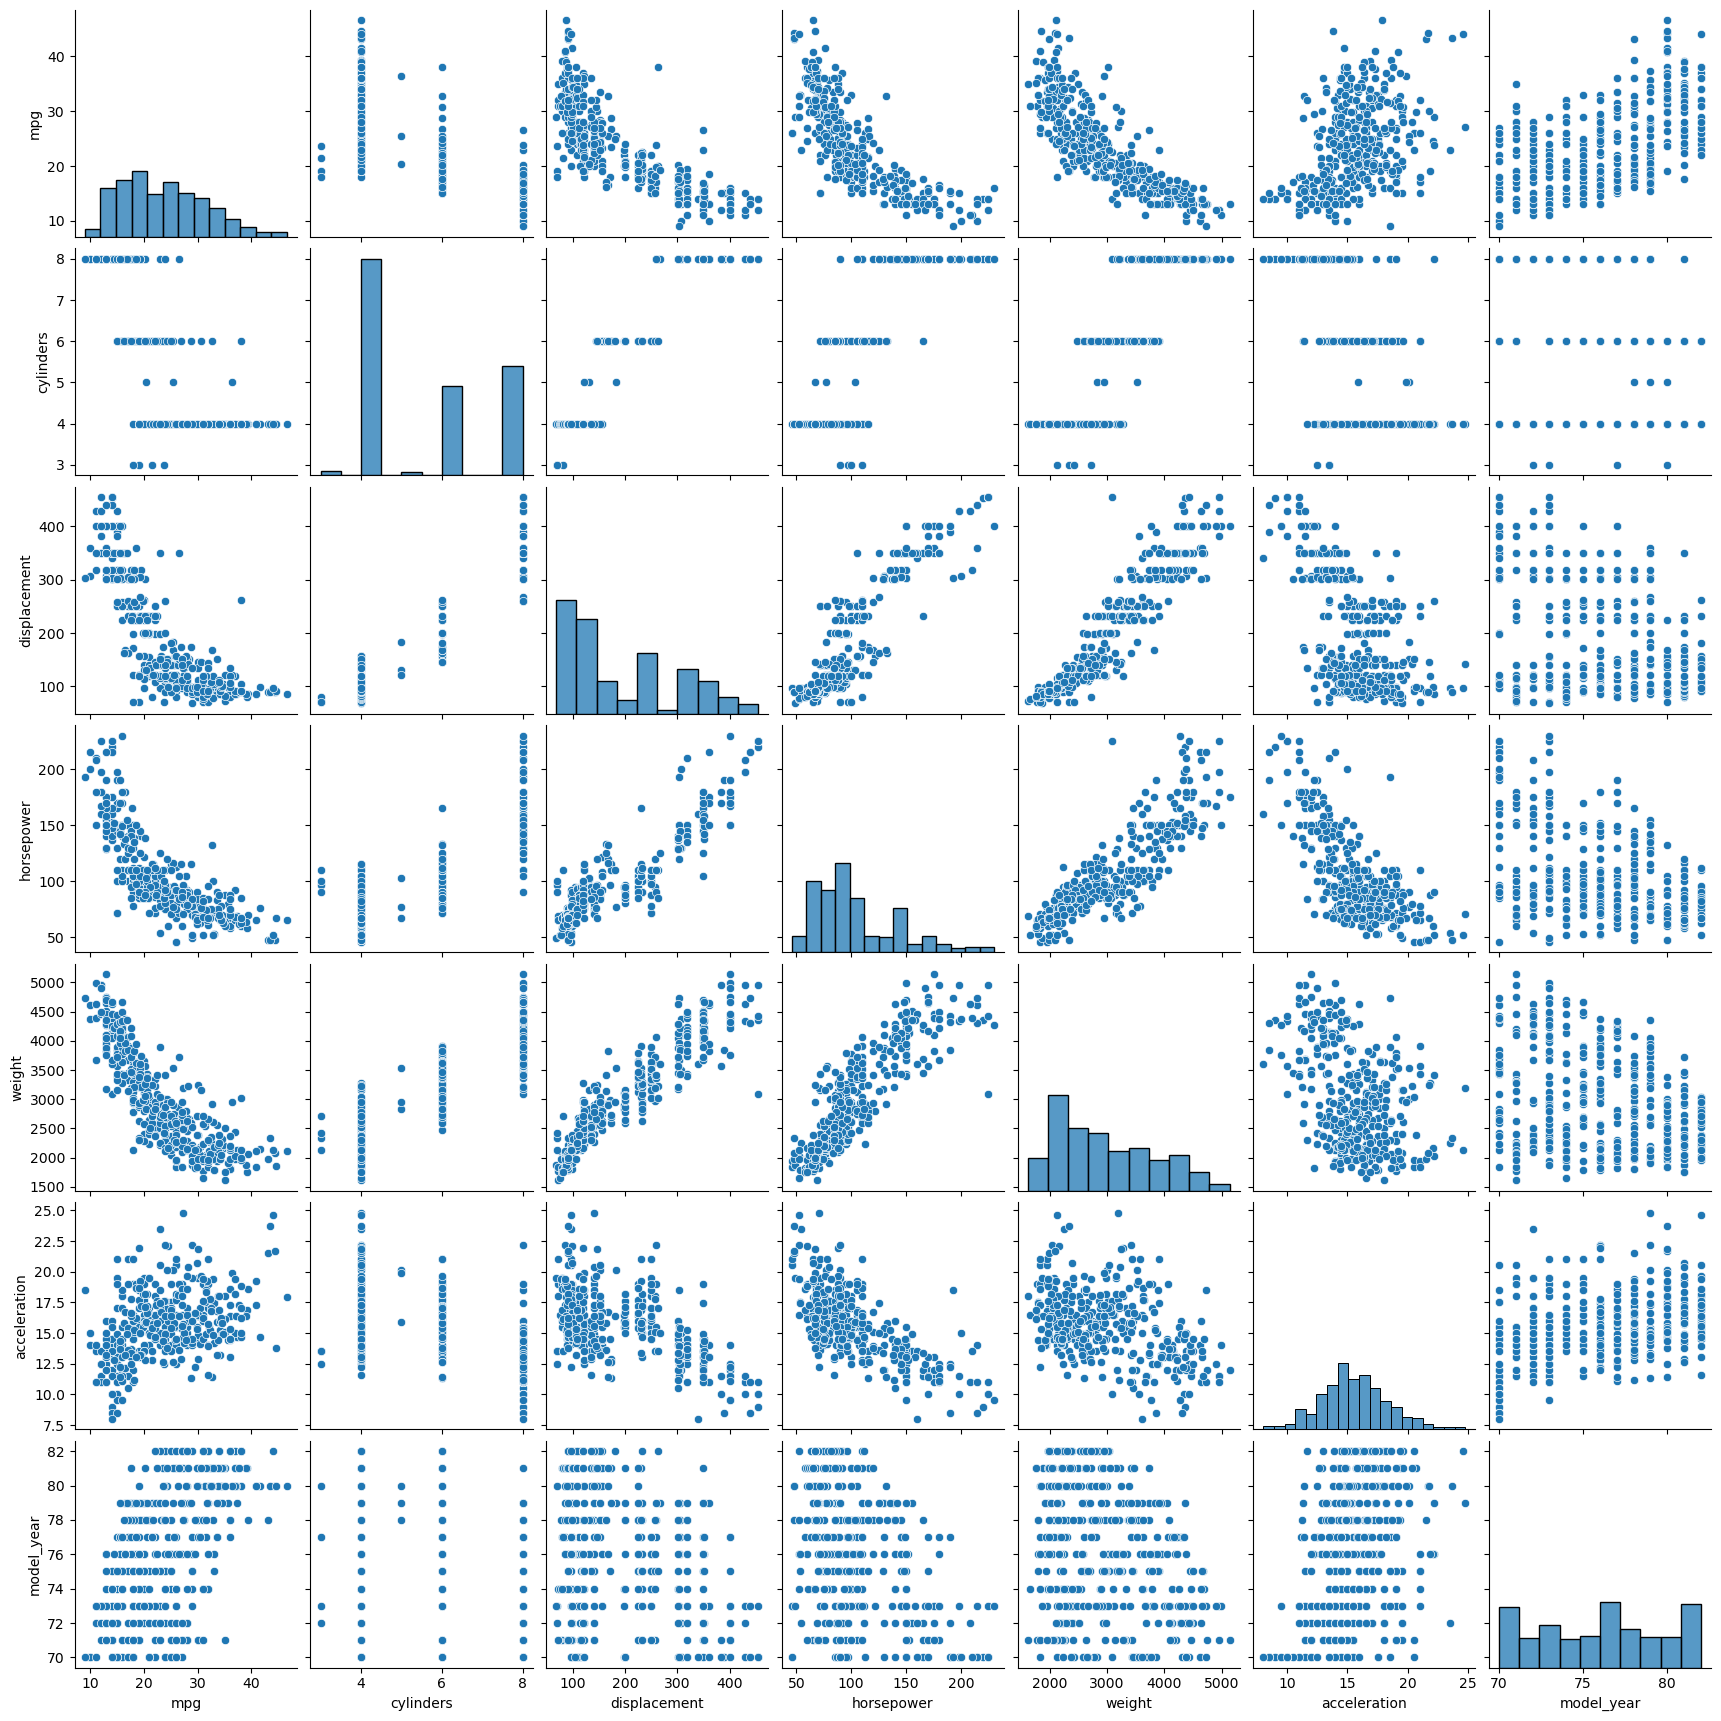

In [58]:
sns.pairplot(mpgdata)
plt.show()

### Analysis of above pairplot  
 - The above figure shows relatioship of each column with each other of entire dataset.
 - It just shows scatterplot with other columns and hist  with own column dataset to show dataset varied with that dataaset .
 


